In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from google.colab import drive
from sklearn.model_selection import train_test_split

np.random.seed(1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
drive.mount('/content/drive')
train_images = []       
train_labels = []
shape = (200,200)  
train_path = "/content/drive/MyDrive/train_ob"

for filename in os.listdir("/content/drive/MyDrive/train_ob"):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
       
        train_labels.append(filename.split('_')[0])

        
        img = cv2.resize(img,shape)
        
        train_images.append(img)


train_labels = pd.get_dummies(train_labels).values
train_images = np.array(train_images)
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New section

In [4]:

test_images = []
test_labels = []
shape = (200,200)
test_path = "/content/drive/MyDrive/test_ob"
for filename in os.listdir("/content/drive/MyDrive/test_ob"):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        test_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        test_images.append(img)
test_images = np.array(test_images)

[1 0 0 0]


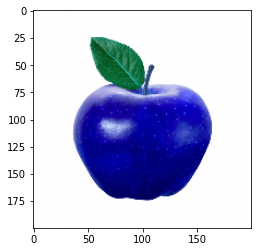

In [5]:

print(train_labels[13])
plt.imshow(train_images[13])

[1 0 0 0]


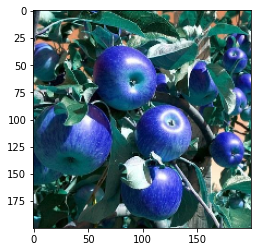

In [6]:

print(train_labels[30])
plt.imshow(train_images[30])

In [7]:

model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 30)        8

In [ ]:
# Training the model
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50


In [ ]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['RCNN', 'CNN'], loc='upper left')
plt.show()

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['RCNN', 'CNN'], loc='upper left')
plt.show()

In [ ]:

evaluate = model.evaluate(x_val,y_val)
print(evaluate)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
plt.style.use('ggplot')
x=['RCNN','CNN']
accuracy=[94.06223,89.62673]

ax=sns.barplot(x,accuracy)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')

low = min(accuracy)
high = max(accuracy)
ax.set_ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])